# HEART STROKE DATA-PREDICTION

import pakages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

LOAD DATASET

In [4]:
df=pd.read_csv("/content/dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [7]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.shape

(43400, 12)

# DATA PREPROCESSING

In [12]:
for col in df.columns:
  print(df[col].value_counts())
  print("**"*18)

30669    1
20384    1
44344    1
13843    1
10813    1
        ..
64649    1
13377    1
64545    1
52084    1
36271    1
Name: id, Length: 43400, dtype: int64
************************************
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
************************************
51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64
************************************
0    39339
1     4061
Name: hypertension, dtype: int64
************************************
0    41338
1     2062
Name: heart_disease, dtype: int64
************************************
Yes    27938
No     15462
Name: ever_married, dtype: int64
************************************
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
************************************
Urban    217

# DATA CLEANING

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

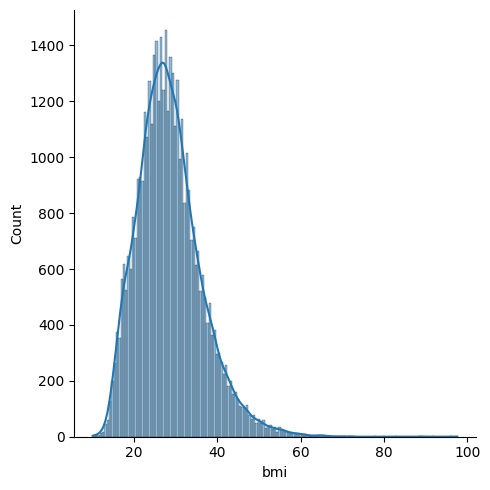

In [15]:
sns.displot(x="bmi",data=df,kde=True)

In [16]:
df["bmi"].fillna(df["bmi"].median(),inplace=True)

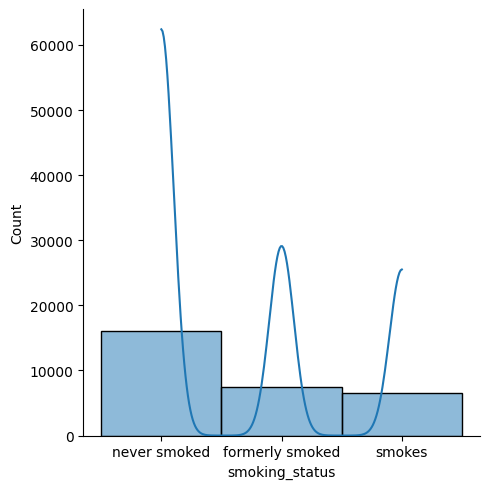

In [17]:
sns.displot(x="smoking_status",data=df,kde=True)

In [18]:
df["smoking_status"].fillna(df["smoking_status"].mode() [0],inplace=True)

In [19]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# DATA ANALYSIS

Text(0.5, 1.0, 'gender')

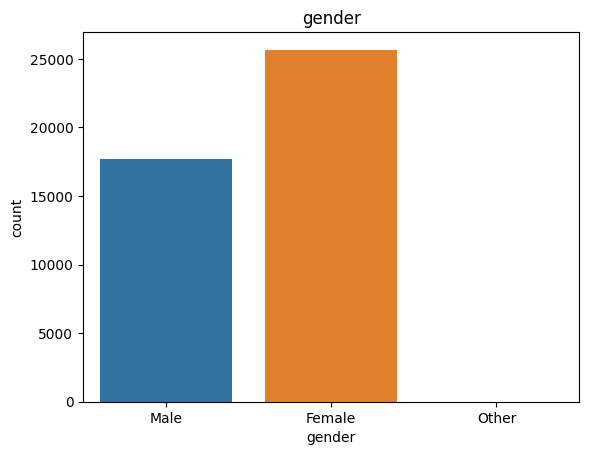

In [20]:
sns.countplot(x="gender",data=df)
plt.title("gender")

<ipython-input-21-7ec400e23181>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


Text(0.5, 1.0, 'age')

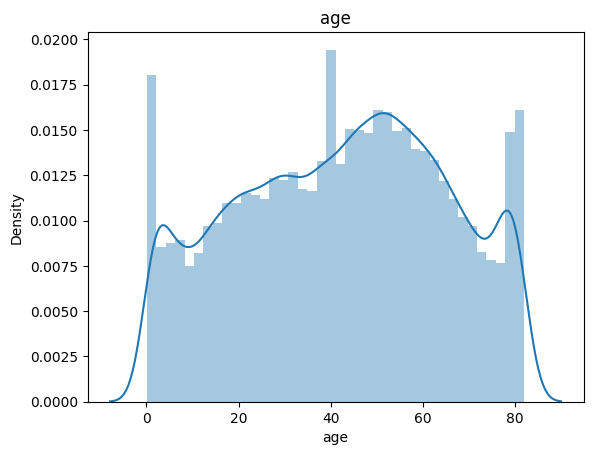

In [21]:
sns.distplot(df["age"])
plt.title("age")

Text(0.5, 1.0, 'gender')

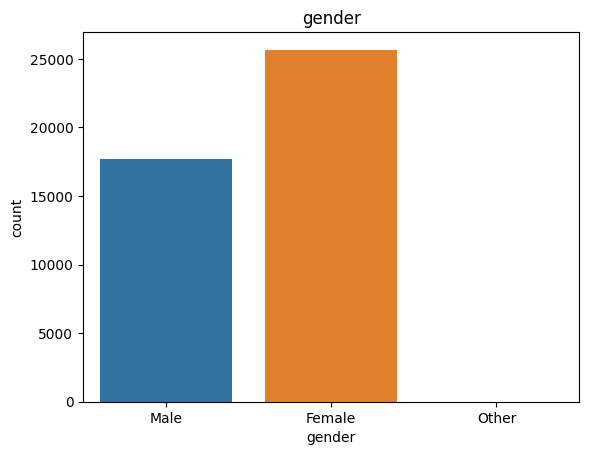

In [22]:
sns.countplot(x="gender",data=df)
plt.title("gender")

Text(0.5, 1.0, 'hypertension count')

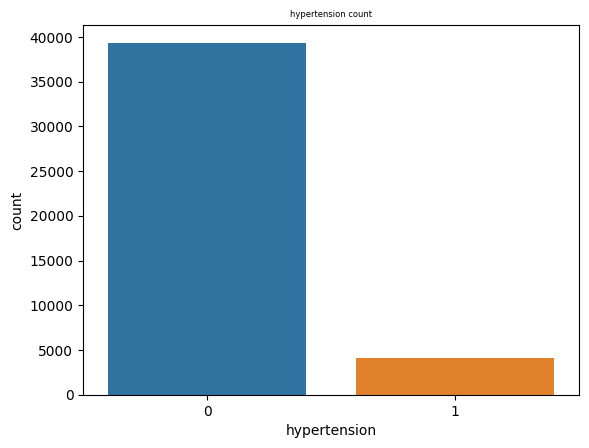

In [23]:
sns.countplot(x="hypertension",data=df)
plt.title("hypertension count",size=6)

Text(0.5, 1.0, 'hypertension vs stroke')

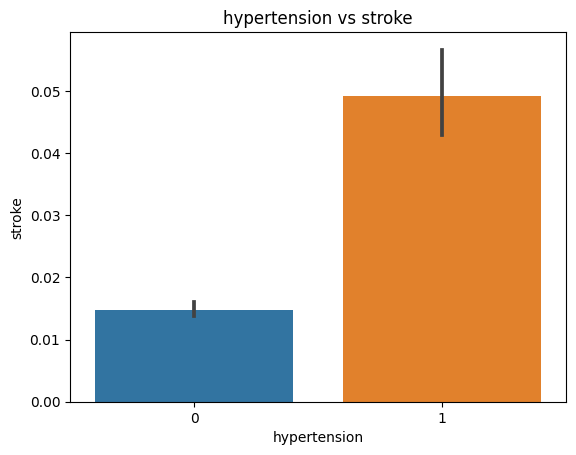

In [24]:
sns.barplot(x="hypertension",y="stroke",data=df)
plt.title("hypertension vs stroke")

Text(0.5, 1.0, 'heart_disease vs stroke')

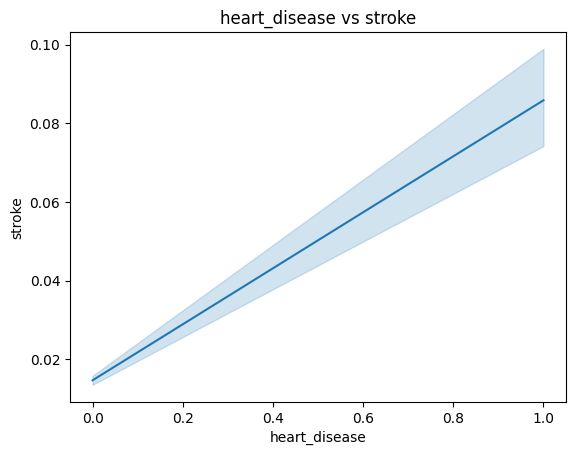

In [25]:
sns.lineplot(x="heart_disease",y="stroke",data=df)
plt.title("heart_disease vs stroke")

Text(0.5, 1.0, 'smoking vs stroke')

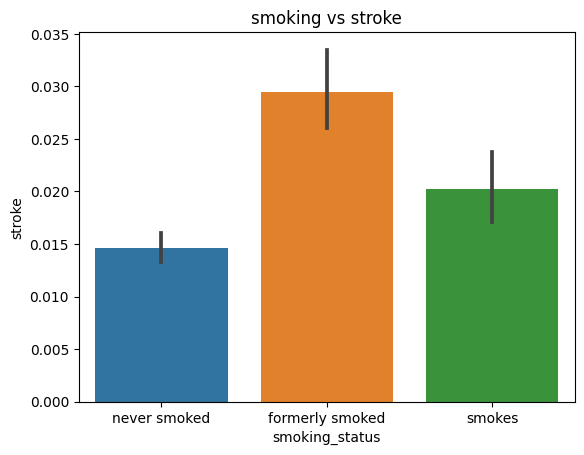

In [26]:
sns.barplot(x="smoking_status",y="stroke",data=df)
plt.title("smoking vs stroke")

# BALANCING

<Axes: xlabel='stroke', ylabel='count'>

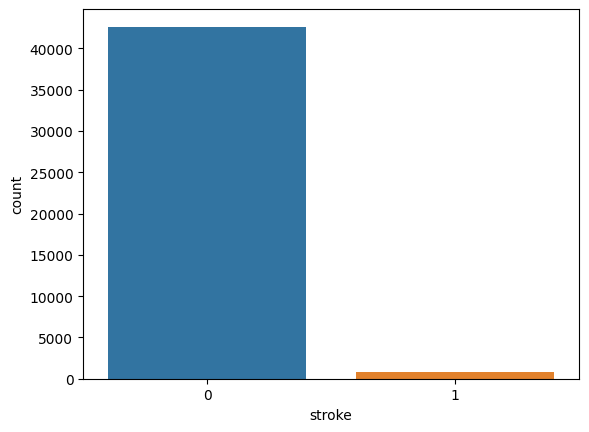

In [27]:
sns.countplot(df,x='stroke')

In [28]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [29]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [30]:
cat_cols = df.select_dtypes("object")
df= pd.get_dummies(df, columns=cat_cols.columns)

In [31]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,16523,8.0,0,0,110.89,17.6,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
43396,5450,56.0,0,0,213.61,55.4,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,28375,82.0,1,0,91.94,28.9,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,27973,40.0,0,0,99.16,33.2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [32]:
target_column='stroke'
x=df.drop(target_column,axis=1)
y=df[target_column]

In [33]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [34]:
cat_cols = x.select_dtypes("object")
x = pd.get_dummies(x, columns=cat_cols.columns)

In [35]:
df1=pd.concat([x_resampled,y_resampled],axis=1)

<Axes: xlabel='stroke', ylabel='count'>

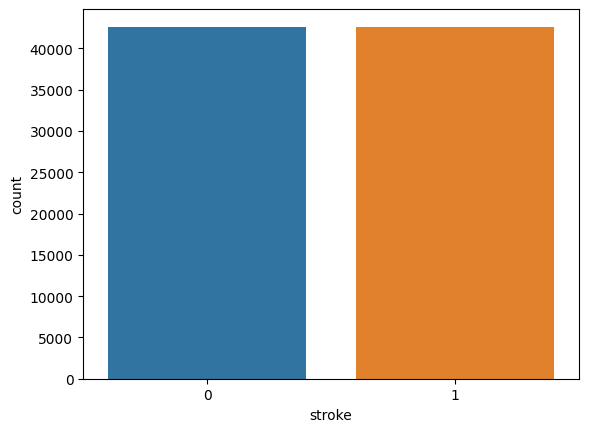

In [36]:
sns.countplot(df1,x='stroke')

Text(0.5, 1.0, 'heatmap')

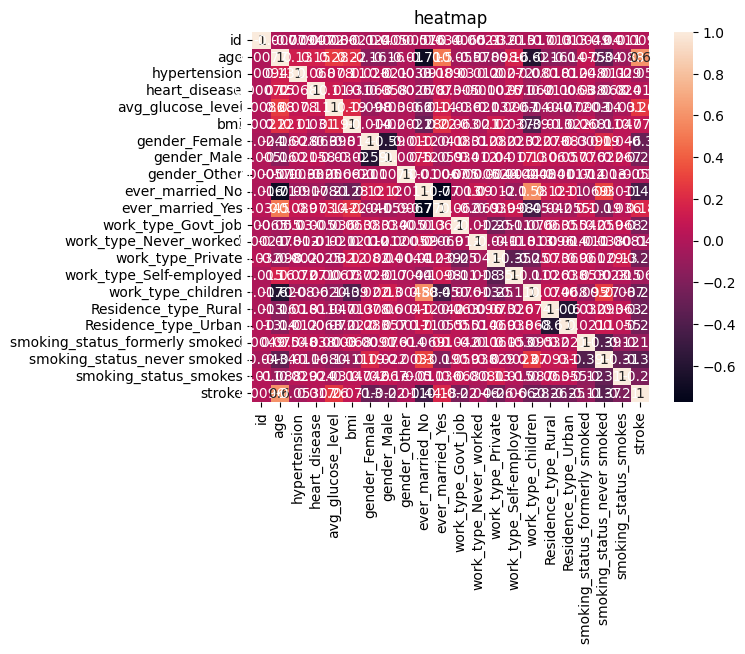

In [37]:
sns.heatmap(df1.corr(),annot=True)
plt.title("heatmap")

In [38]:
df1=df1.drop(["id"],axis=1)

In [39]:
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,3.000000,0,0,95.120000,18.000000,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,58.000000,1,0,87.960000,39.200000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8.000000,0,0,110.890000,17.600000,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,70.000000,0,0,69.040000,35.900000,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,14.000000,0,0,161.280000,19.100000,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85229,77.434971,0,0,77.699807,23.329897,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
85230,51.864604,0,0,101.047764,31.866151,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
85231,76.526469,0,0,94.673956,31.365852,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
85232,73.512545,0,0,181.614709,27.090304,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


# DATA SPLITING

In [44]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

ENCODING categorical features by get-dummies

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [45]:
x.shape

(85234, 20)

In [46]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.000000,0,0,95.120000,18.000000,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,58.000000,1,0,87.960000,39.200000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,8.000000,0,0,110.890000,17.600000,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,70.000000,0,0,69.040000,35.900000,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,14.000000,0,0,161.280000,19.100000,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85229,77.434971,0,0,77.699807,23.329897,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
85230,51.864604,0,0,101.047764,31.866151,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
85231,76.526469,0,0,94.673956,31.365852,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
85232,73.512545,0,0,181.614709,27.090304,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


# NORMALISATION

In [47]:
scaler=StandardScaler()
scaler.fit(x_test)
x_train=scaler.transform (x_train)
x_test=scaler.transform(x_test)


In [48]:
x_train

array([[ 0.41511841, -0.28756072, -0.22670667, ...,  2.56931264,
        -0.99520138, -0.31618015],
       [-0.45898021, -0.28756072, -0.22670667, ...,  2.56931264,
        -0.99520138, -0.31618015],
       [ 0.9552956 , -0.28756072,  4.41098628, ..., -0.38920916,
        -0.99520138, -0.31618015],
       ...,
       [ 0.70665544, -0.28756072,  4.41098628, ..., -0.38920916,
        -0.99520138, -0.31618015],
       [ 0.69123597, -0.28756072, -0.22670667, ...,  2.56931264,
        -0.99520138, -0.31618015],
       [ 0.2311495 , -0.28756072, -0.22670667, ...,  2.56931264,
        -0.99520138, -0.31618015]])

In [49]:
x_test

array([[ 0.86876027,  3.47752641, -0.22670667, ..., -0.38920916,
        -0.99520138, -0.31618015],
       [ 0.7845405 , -0.28756072, -0.22670667, ..., -0.38920916,
        -0.99520138, -0.31618015],
       [ 1.05507967, -0.28756072, -0.22670667, ..., -0.38920916,
        -0.99520138, -0.31618015],
       ...,
       [-0.68902344, -0.28756072, -0.22670667, ..., -0.38920916,
        -0.99520138,  3.16275387],
       [-0.41297156, -0.28756072, -0.22670667, ..., -0.38920916,
        -0.99520138,  3.16275387],
       [ 0.89353164,  3.47752641, -0.22670667, ..., -0.38920916,
        -0.99520138, -0.31618015]])

# MODEL CREATION AND EVALUVATION

# 1.K-Neighbor classifier


In [50]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred


array([1, 1, 1, ..., 0, 0, 1])

0.9788041140354308

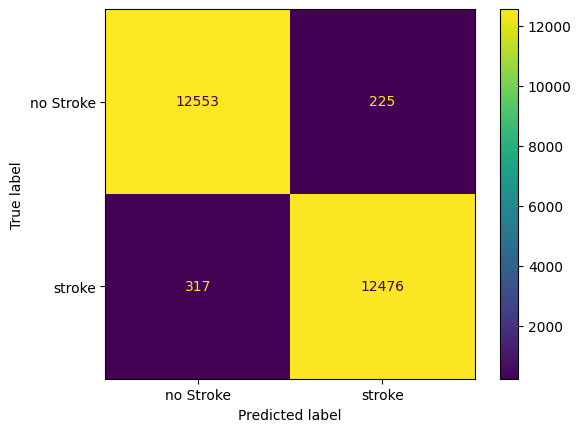

In [51]:
labels=["no Stroke","stroke"]
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score=accuracy_score(y_test,y_pred)
score

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12778
           1       0.98      0.98      0.98     12793

    accuracy                           0.98     25571
   macro avg       0.98      0.98      0.98     25571
weighted avg       0.98      0.98      0.98     25571



# 2.Logistic Regression


0.9745414727621133

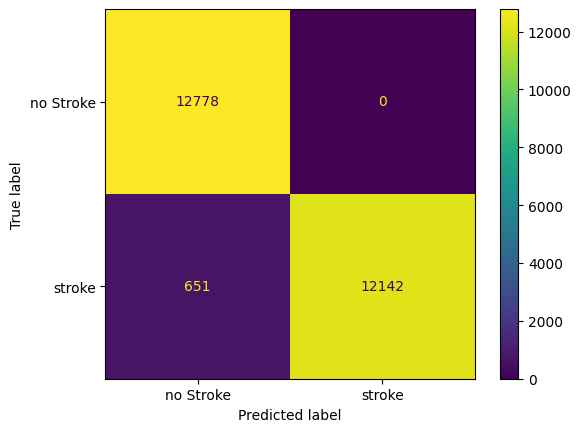

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
score = accuracy_score(y_test, y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12778
           1       1.00      0.95      0.97     12793

    accuracy                           0.97     25571
   macro avg       0.98      0.97      0.97     25571
weighted avg       0.98      0.97      0.97     25571



# 3.Random Forest


0.9854913769504516

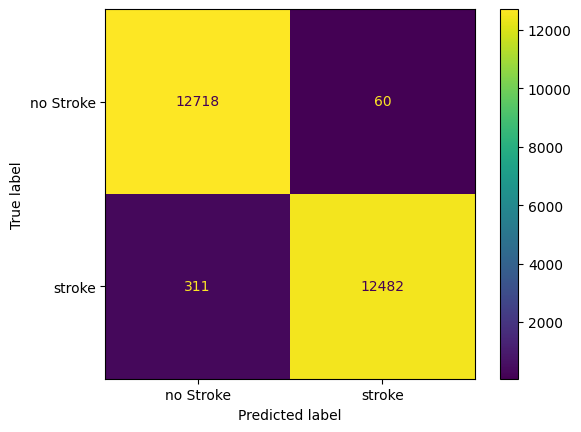

In [55]:
rdm=RandomForestClassifier(n_estimators=100,random_state=42)
rdm.fit(x_train,y_train)
y_pred=rdm.predict(x_test)
score=accuracy_score(y_test,y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12778
           1       1.00      0.98      0.99     12793

    accuracy                           0.99     25571
   macro avg       0.99      0.99      0.99     25571
weighted avg       0.99      0.99      0.99     25571



# 4.Gaussian NB

0.7227327832310039

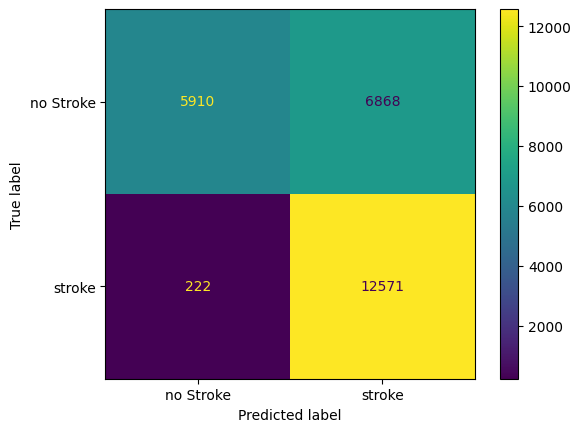

In [57]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
score=accuracy_score(y_test,y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.63     12778
           1       0.65      0.98      0.78     12793

    accuracy                           0.72     25571
   macro avg       0.81      0.72      0.70     25571
weighted avg       0.81      0.72      0.70     25571



# 5.Bernoulli NB


0.8571428571428571

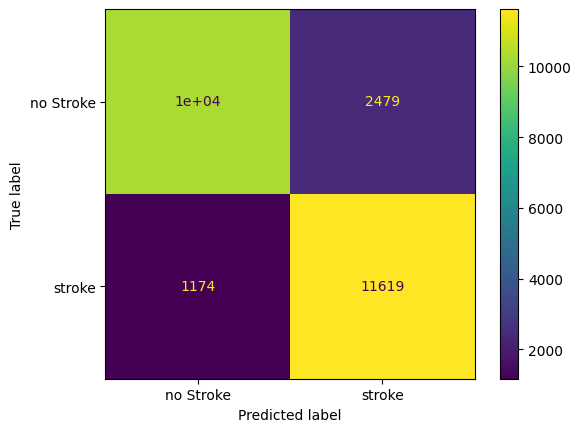

In [59]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
score=accuracy_score(y_test,y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     12778
           1       0.82      0.91      0.86     12793

    accuracy                           0.86     25571
   macro avg       0.86      0.86      0.86     25571
weighted avg       0.86      0.86      0.86     25571



# 6.SVM

0.9745414727621133

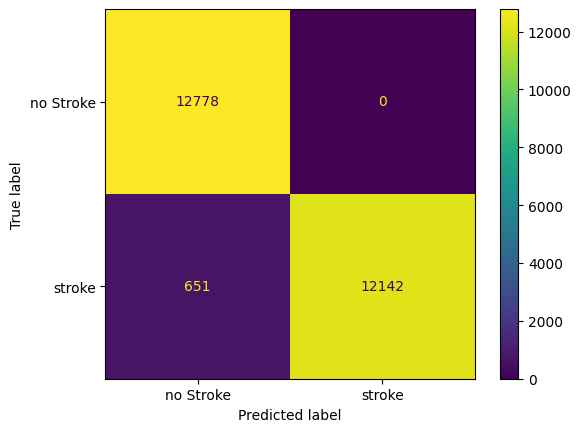

In [61]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
score=accuracy_score(y_test,y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12778
           1       1.00      0.95      0.97     12793

    accuracy                           0.97     25571
   macro avg       0.98      0.97      0.97     25571
weighted avg       0.98      0.97      0.97     25571



# 7.XGBooster

0.9863908333659224

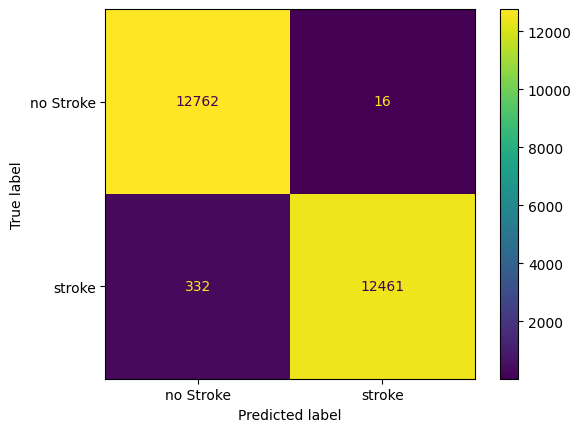

In [63]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train, y_train)
y_pred= xgb.predict(x_test)
score=accuracy_score(y_test,y_pred)
result= confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
score


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12778
           1       1.00      0.97      0.99     12793

    accuracy                           0.99     25571
   macro avg       0.99      0.99      0.99     25571
weighted avg       0.99      0.99      0.99     25571

